In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
reviews_df = pd.read_csv('/content/drive/MyDrive/Final/전처리/labeled_data/final_combined_labeled.csv')

# 보카

In [ ]:
voca_data = reviews_df[reviews_df['app_name'] == 'voca']

---
## Voca 월별 감성 분포

In [ ]:
# voca_data에 'year_month' 컬럼 추가 및 월별 감성 레이블 분석 적용
voca_data['year_month'] = pd.to_datetime(voca_data['at']).dt.to_period('M')

# 년도-월별 긍정/중립/부정 레이블 개수 계산
monthly_sentiment_count_voca = voca_data.groupby(['year_month', 'sentiment_label']).size().unstack(fill_value=0)

# 결과 출력
monthly_sentiment_count_voca

<ipython-input-19-25015be05c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voca_data['year_month'] = pd.to_datetime(voca_data['at']).dt.to_period('M')


sentiment_label,-1.0,0.0,1.0
year_month,,,
2020-01,1,0,8
2020-02,3,0,3
2020-03,9,0,6
2020-04,7,0,36
2020-05,8,1,55
2020-06,5,0,66
2020-07,21,4,252
2020-08,24,0,308
2020-09,19,1,266


<ipython-input-5-8f30f1017a26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voca_data['month'] = pd.to_datetime(voca_data['at']).dt.to_period('M')


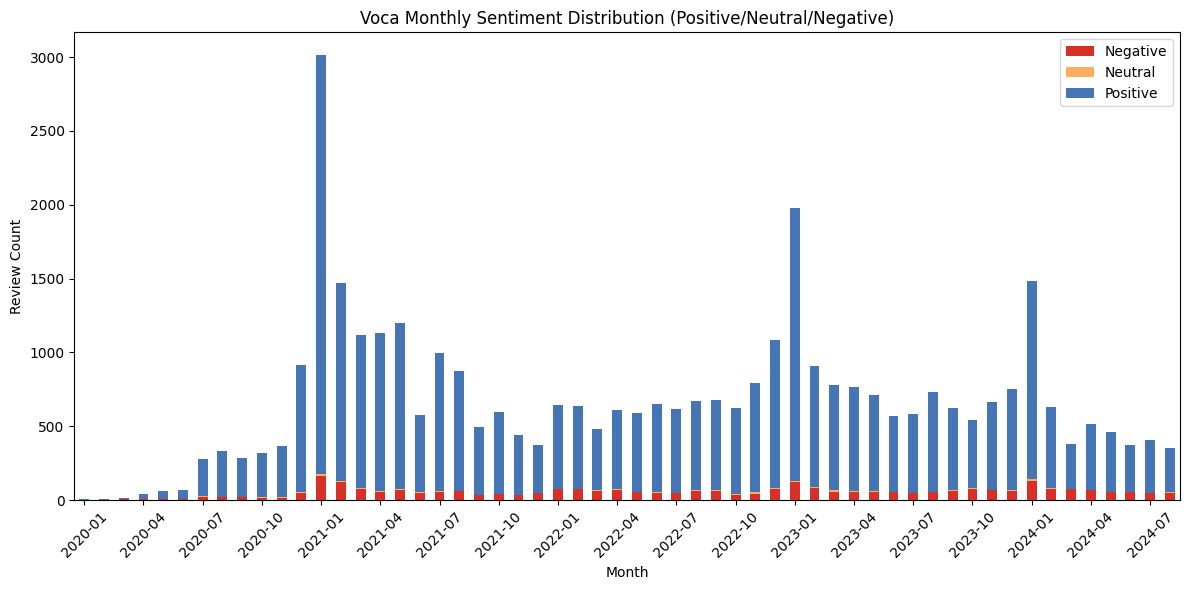

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'at' 컬럼에서 년도-월 정보 추출
voca_data['month'] = pd.to_datetime(voca_data['at']).dt.to_period('M')

# 월별 긍정/중립/부정 레이블 개수 계산
monthly_sentiment = voca_data.groupby(['month', 'sentiment_label']).size().unstack(fill_value=0)

# 그래프 시각화 (색상 변경: RdYlBu)
colors = ['#d73027', '#fdae61', '#4575b4']  # Negative: Red, Neutral: Yellow, Positive: Blue

# 월별 총 리뷰 수에 따른 stacked bar chart 생성
ax = monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# X축 레이블을 3개월 간격으로 설정
xticks_labels = monthly_sentiment.index[::3]  # 3개월 간격으로 월 데이터 추출
ax.set_xticks(range(0, len(monthly_sentiment), 3))  # 3개월 간격으로 틱 설정
ax.set_xticklabels(xticks_labels, rotation=45)  # 3개월 간격으로 레이블 설정

# 그래프 세부 설정
plt.title('Voca Monthly Sentiment Distribution (Positive/Neutral/Negative)')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()  # 레이아웃 조정
plt.show()

## 앱 버젼별

---
모든 버전 말고 주요버전만 표시

<ipython-input-9-e279ae256852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voca_data['version_group'] = voca_data['appVersion'].str.extract(r'(\d\.\d)').fillna('Other')


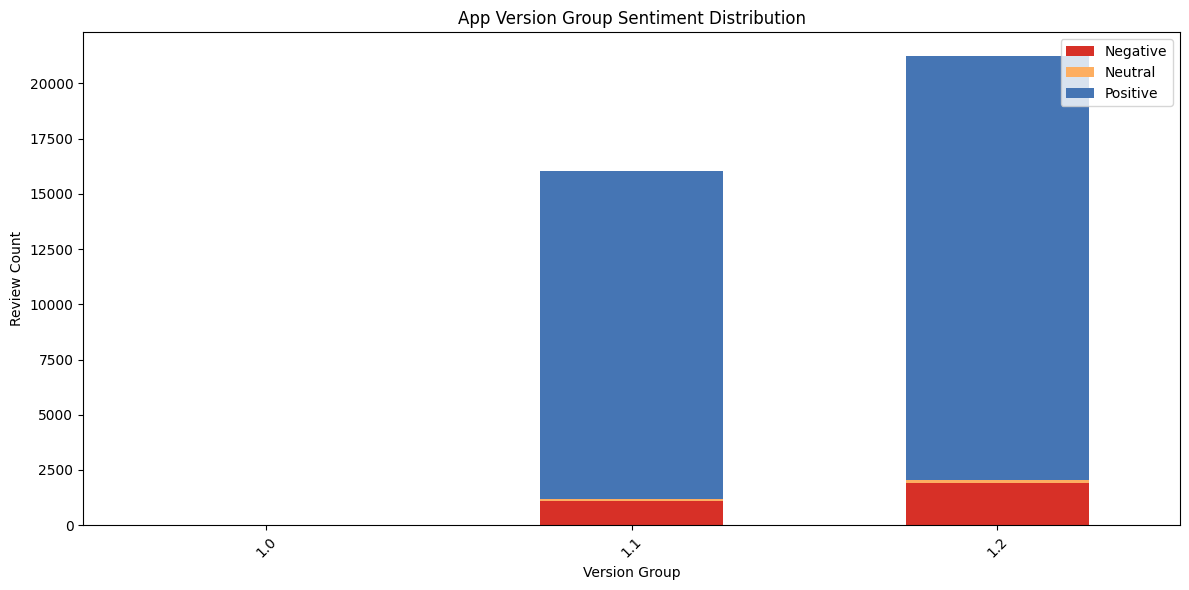

In [ ]:
# 주요 버전 그룹화 (2.x, 3.x 등)
voca_data['version_group'] = voca_data['appVersion'].str.extract(r'(\d\.\d)').fillna('Other')

# 버전 그룹별 긍정/중립/부정 비율 분석
version_group_sentiment = voca_data.groupby(['version_group', 'sentiment_label']).size().unstack(fill_value=0)
version_group_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 그래프 세부 설정
plt.title('App Version Group Sentiment Distribution')
plt.xlabel('Version Group')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()
plt.show()


- 3.1버전 그룹에서 리뷰가 가장 많음(긍/부정 모두 포함)
- 대부분의 버전에서 긍정적인 리뷰가 우세

---
상위 10개 버전별 감성 분포

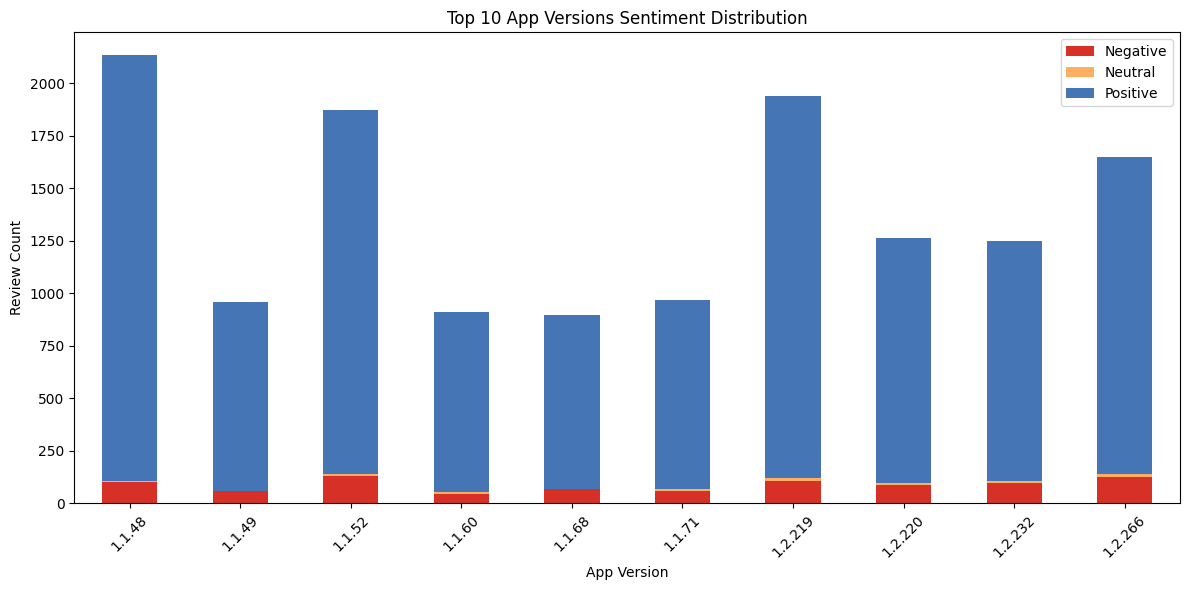

In [ ]:
# 앱 버전별 리뷰 개수 상위 10개 버전 필터링
top_versions = voca_data['appVersion'].value_counts().nlargest(10).index
top_version_data = voca_data[voca_data['appVersion'].isin(top_versions)]

# 상위 10개 버전에 대해 긍정/중립/부정 비율 분석
version_sentiment = top_version_data.groupby(['appVersion', 'sentiment_label']).size().unstack(fill_value=0)
version_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 그래프 세부 설정
plt.title('Top 10 App Versions Sentiment Distribution')
plt.xlabel('App Version')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')
plt.tight_layout()
plt.show()


## 리뷰 점수와 감성 레이블 간의 상관관계

In [ ]:
# 리뷰 점수와 감성 레이블 간의 상관관계를 분석하기 위해 각 점수별로 감성 레이블의 평균을 확인
score_sentiment_correlation = voca_data.groupby('score')['sentiment_label'].mean()

# 결과 출력
score_sentiment_correlation

,sentiment_label
score,
1,-0.716061
2,-0.623229
3,-0.375661
4,0.591791
5,0.945045


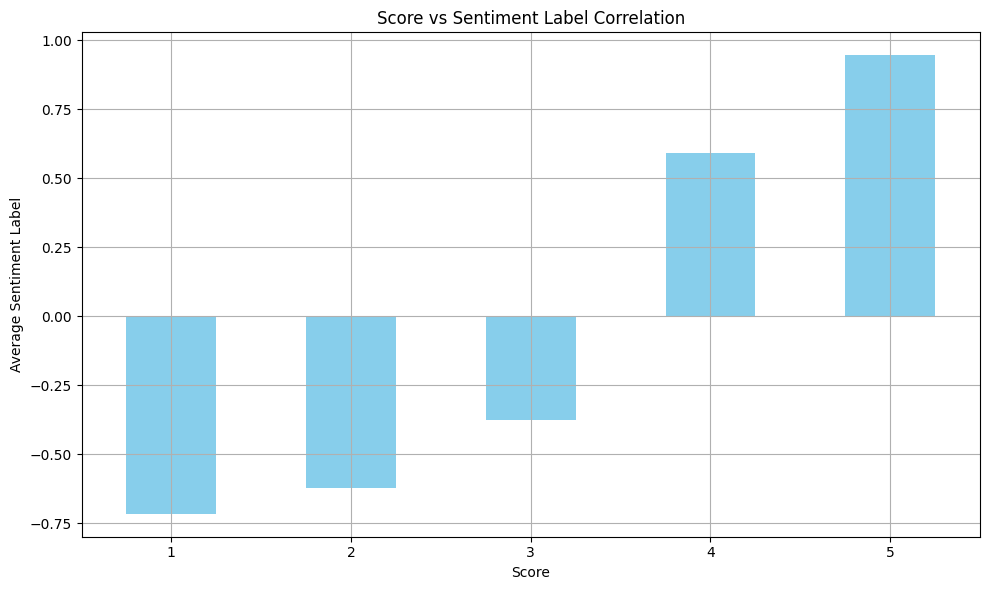

In [ ]:
import matplotlib.pyplot as plt

# 점수와 감성 레이블 간의 상관관계를 그래프로 시각화
score_sentiment_correlation.plot(kind='bar', figsize=(10, 6), color='skyblue')

# 그래프 세부 설정
plt.title('Score vs Sentiment Label Correlation')
plt.xlabel('Score')
plt.ylabel('Average Sentiment Label')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

- 점수가 낮을수록 부정적인 감정을 많이 담고 있음
- 점수가 높을수록 긍정적인 감정을 많이 담고 있음

  = 점수가 높을수록 긍정적인 리뷰가 많고, 점수가 낮을수록 부정적인 리뷰가 많음

버전 그룹별 평균 점수

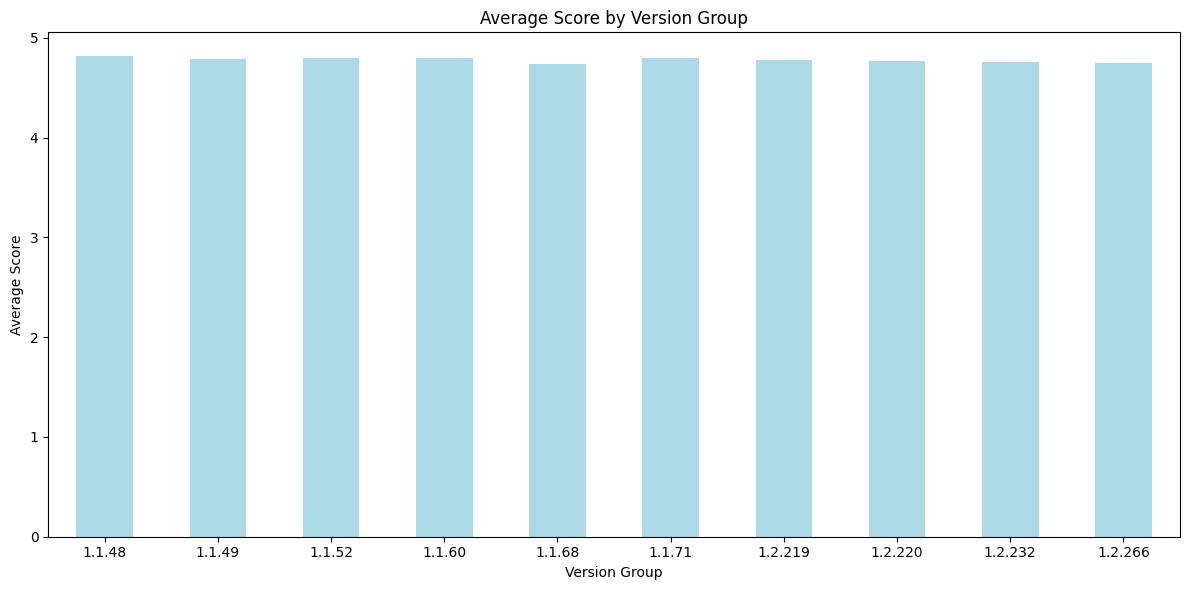

In [ ]:
# 버전 그룹화 (2.x, 3.x 등)
# 버전 그룹별 평균 점수 계산
top_version_score_avg = top_version_data.groupby('appVersion')['score'].mean()

# 그래프 시각화
top_version_score_avg.plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title('Average Score by Version Group')
plt.xlabel('Version Group')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
version_score_avg = voca_data.groupby('appVersion')['score'].mean()
version_score_avg

,score
appVersion,
1.0.78,4.666667
1.0.79,4.500000
1.1.11,4.739130
1.1.13,4.659574
1.1.18,4.733333
...,...
1.2.297,4.732673
1.2.298,4.754864
1.2.300,4.779221


앱 버전별 평균 점수(꺾은선 그래프)

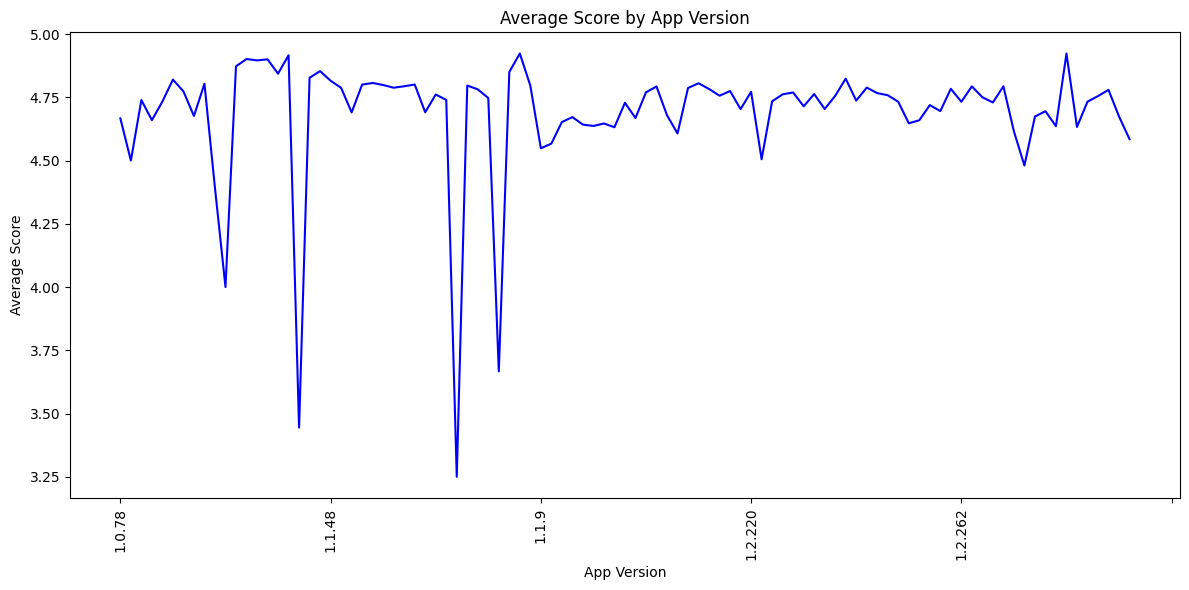

In [ ]:
# 버전별 평균 점수 계산 (꺾은선 그래프)
version_score_avg.plot(kind='line', figsize=(12, 6), color='blue')
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- 전반적으로 4-5점 사이에서 움직임
- 몇몇 버전에서 평균 점수가 급격히 떨어지는 구간이 있음

시간에 따른 평균 점수 변화

In [ ]:
monthly_score_avg = voca_data.groupby('month')['score'].mean()
monthly_score_avg

,score
month,
2020-01,4.888889
2020-02,3.500000
2020-03,3.466667
2020-04,4.372093
2020-05,4.578125
2020-06,4.816901
2020-07,4.722022
2020-08,4.753012
2020-09,4.825175


<ipython-input-20-873ba6a7dc95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voca_data['year_month_str'] = voca_data['year_month'].dt.strftime('%Y-%m')


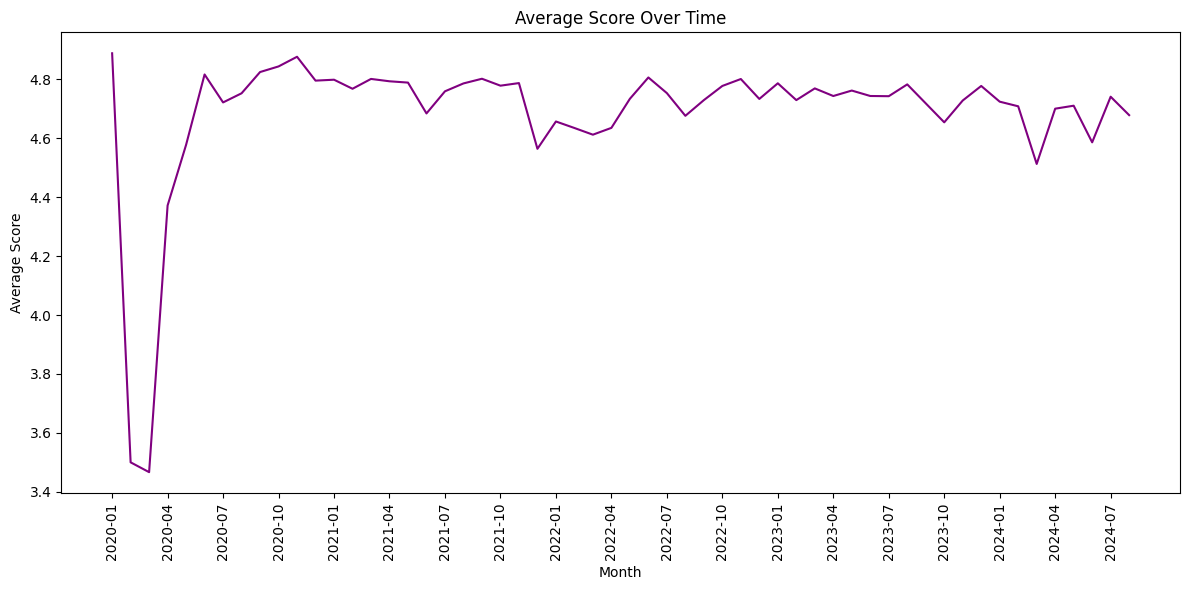

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 'year_month'을 문자열로 변환하여 년-월 형식으로 표시
voca_data['year_month_str'] = voca_data['year_month'].dt.strftime('%Y-%m')

# 월별 평균 점수 계산
monthly_score_avg = voca_data.groupby('year_month_str')['score'].mean()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_score_avg.index, monthly_score_avg.values, color='purple')

# 3개월 간격으로 X축 레이블 표시
xticks_labels = monthly_score_avg.index[::3]  # 3개월 간격으로 연-월 데이터 추출
plt.xticks(ticks=np.arange(0, len(monthly_score_avg.index), 3), labels=xticks_labels, rotation=90)

# 그래프 세부 설정
plt.title('Average Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()

- 서비스 개시 초기 (2020년 1-3월) 사이에 크게 하락한 후 대체로 긍정적인 점수대를 유지
- 전반적으로 사용자의 평균 점수가 긍정적인 범위에 속함

감성 레이블에 따른 평균 좋아요 수

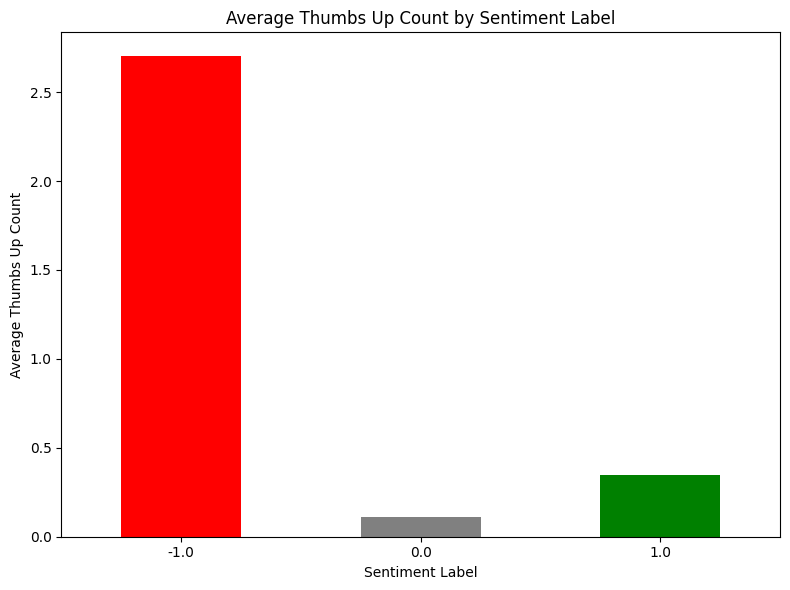

In [ ]:
# 좋아요 수와 감성 레이블의 관계 분석 (좋아요 수 상위 10개)
thumbsUp_sentiment = voca_data.groupby('sentiment_label')['thumbsUpCount'].mean()

# 그래프 시각화
thumbsUp_sentiment.plot(kind='bar', figsize=(8, 6), color=['red', 'gray', 'green'])
plt.title('Average Thumbs Up Count by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Thumbs Up Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 부정적인 감성 레이블이 가장 많은 좋아요를 받음
- 평균적으로 부정적인 리뷰는 2.5개 이상의 좋아요를 받음
- 부정적인 리뷰가 더 많은 사용자들의 공감을 얻음을 확인할 수 있음

점수에 따른 평균 좋아요 수

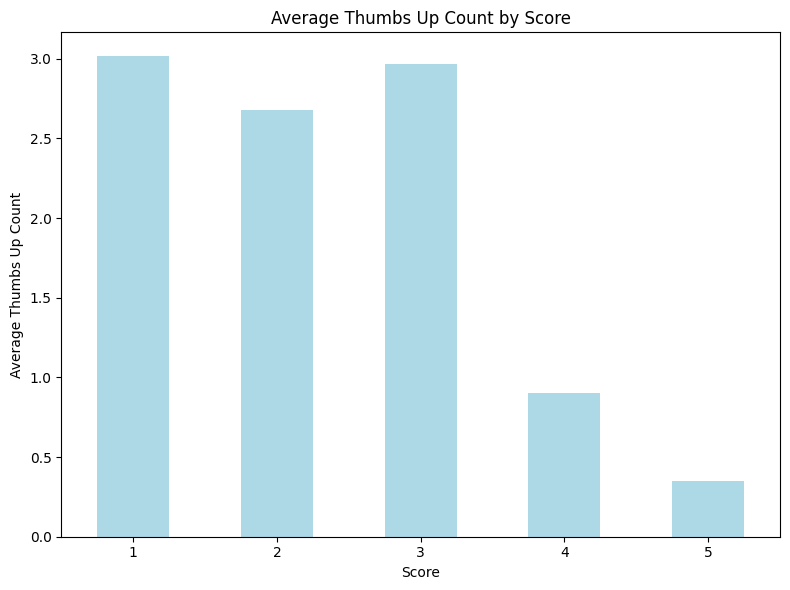

In [ ]:
# 점수와 좋아요 수의 관계 분석
score_thumbsUp = voca_data.groupby('score')['thumbsUpCount'].mean()

# 그래프 시각화
score_thumbsUp.plot(kind='bar', figsize=(8, 6), color='lightblue')
plt.title('Average Thumbs Up Count by Score')
plt.xlabel('Score')
plt.ylabel('Average Thumbs Up Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 1점, 3점 리뷰가 가장 많은 좋아요를 받음
- 대체로 부정적인 점수를 준 리뷰가 다른 사용자들의 공감을 얻음을 확인
- 스픽에 비해 말해보카 유저들이 중립적인 리뷰를 선호하는 편